In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn as sk

# Create datasets for grouped data operations
df = pd.read_csv('./output/masterfile.csv')
df2 = df.groupby('year').sum().reset_index()
df3 = df.groupby('year').agg(
    {
        'US_milex': 'first', 
        'SU_milex': 'first',
        'UK_milex': 'first',
        'FR_milex': 'first',
        'Soviet Union': 'sum',
        'United States': 'sum',
        'France': 'sum', 
        'United Kingdom': 'sum',
        'COL_MIDI': 'sum',
        'US_cinc': 'first',
        'SU_cinc': 'first',
        'UK_cinc': 'first',
        'FR_cinc': 'first',
        'war': 'sum',
        'ponatind': 'sum',
        'onatind': 'sum',
        'pointrap': 'sum',
        'ointrap': 'sum',
        'pointer': 'sum',
        'ointer': 'sum',
        'pocivil': 'sum',
        'ocivil': 'sum',
        'pononind': 'sum',
    }
).reset_index()


def run(x, y):
    """
    A simple function that runs Logit regressions
    """
    logit = sm.Logit(df[y], df[x], missing='drop')
    results = logit.fit(missing='drop')
    return results.summary() #, np.exp(results.params)

# def run_reg(x, y):
#     """
#     A simple function that runs OLS regressions
#     Regquires manual dataframe input - as there are multiple
#     options
#     """
#     model = sm.OLS(x, y).fit()
#     return model.summary()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900 entries, 0 to 6899
Columns: 181 entries, Unnamed: 0 to COL_MIDI
dtypes: float64(133), int64(41), object(7)
memory usage: 9.5+ MB


# Descriptive Statistics

## Interventions, by actors per year

The linegraphs of the US, Soviet and colonial interventions show a general rise in interventions for the United States that stalls out during the period of the Vietnam War. 

On the Soviet Side both its collapse and the ramping up during the late 70's are cleary displayed - the period before is affected mainly by its interventions in Eastern Europe whereas the later interventions show the rising interest in the 'Third World'. 

The graph for interventions of the colonial powers Spikes directly after the Second World War as many of their former colonies revolted. Another wave of revolutionary wars during the 60s is visible as well - as are the Portugse attempts to retain their empire. 

 

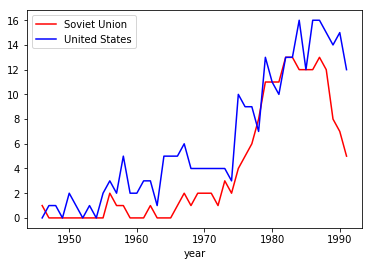

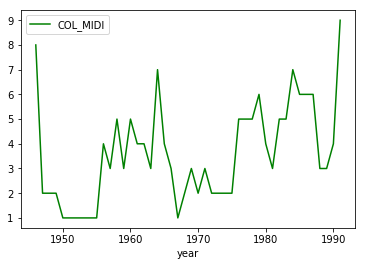

In [2]:
df2.plot('year', ['Soviet Union', 'United States'], color=['r', 'b'])
df2.plot('year', 'COL_MIDI', color='g')

## Total US & Soviet interventions as a linear function

The scatterplot indicates a strong corrolation between US and Soviet interventions, which is corroborated by the linear model below. It is interesting to note that  - according to the model-  the United States are more affected by their opponents interventions than the Soviet Union. 

An alternative explanation would be that exterior factors caused an increase of interventions for both of the United States and the Soviet Union. The linear models below attempt to correct for this possibilty by including the following variables:

* 'Soviet Union' - The total number of Soviet Intervention per year
* 'war' - The total amount of wars per year
* 'US_cinc' - The 'cinc' score for the United States
* 'SU_cinc' - The 'cinc' score for the Soviet Union
* 'ponatind' - The total amount of ongoing 'nationalist wars of indepedence'
* 'onatind' - The total amount of onsets of 'nationalist wars of indepedence'
* 'ointrap' - The total amount of onsets of 'intra-polity wars'
* 'pointrap' - The total amount of ongoing 'intra-polity wars'


The *'CINC'* (Composite Index of National Capability) is a measurement of the national power of each nation. It represents a average of a nations share in the world total of six variables dealing with demographic, economic and military strength. 

The *'OINTRAP'* and *'ONATIND'* variables represent specific types of wars which some literature strongly associates with either the United States or Soviet Union.
Wars of independence can measure anti colonial wars, whereas intra-polity wars represent both communist and anti-communist conflicts. 





Text(0.5,1,'Total interventions by year - US')

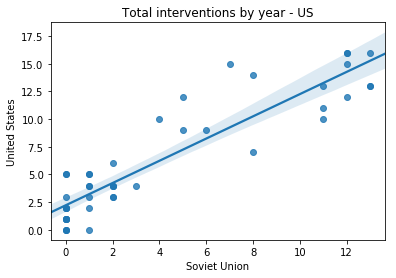

In [3]:
sn.regplot('Soviet Union', 'United States', data=df2).set_title('Total interventions by year - US')

In [4]:
model = sm.OLS(df3['United States'],df3[[
    'Soviet Union',
    'war', 'US_cinc',
    'US_milex', 'SU_milex',
    'SU_cinc', 'ponatind', 'onatind', 'ointrap', 'pointrap']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          United States   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 28 May 2018   Prob (F-statistic):           4.21e-25
Time:                        19:50:53   Log-Likelihood:                -78.665
No. Observations:                  46   AIC:                             177.3
Df Residuals:                      36   BIC:                             195.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Soviet Union     0.5992      0.201      2.987   

#### Soviet Union

Both linear models show that the corrolation between interventions between the United States and Soviet Union persist for both countries, despite the added control variables

The model predicts are larger influence for *'POINTRAP'* and the *'US_CINC'*  variables for the United States. The first variables includes 'reactive' support against communist groups within countries, the second measures an increase in US strength compared to the Soviet Union (and the rest of the world). This model thus seems to suggest a 'reactive' stance on the US its side. 

The Soviet Unions responses can best be predicted by either the outbreak of war, or the number of US interventions. Neither of the wartypes were statistically significant, so its not possible to make any conclusions on the nature of Soviet strategy. 

Text(0.5,1,'Total interventions by year - SU')

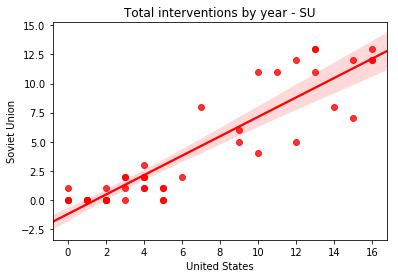

In [5]:
sn.regplot('United States', 'Soviet Union', data=df2, color='r').set_title('Total interventions by year - SU')

In [6]:
model = sm.OLS(df3['Soviet Union'],df3[[
    'United States',
    'war', 'US_cinc',
    'US_milex', 'SU_milex',
    'SU_cinc', 'ponatind', 'onatind',
    'ointrap', 'pointrap']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Soviet Union   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.70e-25
Time:                        19:50:54   Log-Likelihood:                -65.041
No. Observations:                  46   AIC:                             150.1
Df Residuals:                      36   BIC:                             168.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
United States     0.3314      0.111      2.987

## Total Interventions by actor

The United States intervened much more often than the Soviet Union. 
The combined interventions of all of the six colonial powers in 1945 (United Kingdom, France, Netherlands, Belgium, Portugal, Spain) rank last. 

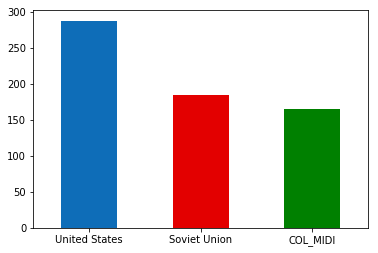

In [7]:
df2[[
    'United States', 
    'Soviet Union', 
    'COL_MIDI']].sum().plot.bar(
    color=['#0e6db8', '#E30000', 'g'], rot=0
)


## Type of intervention (1975 onward)

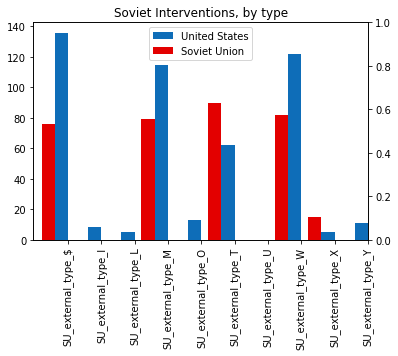

In [8]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df2[[
    'US_external_type_$',
    'US_external_type_I',
    'US_external_type_L',
    'US_external_type_M',
    'US_external_type_O',
    'US_external_type_T',
    'US_external_type_U',
    'US_external_type_W',
    'US_external_type_X',
    'US_external_type_Y'
    
]].sum().plot.bar(
    title='US Interventions, by type',
    color='#0e6db8', ax=ax, width=width, position=1,
    label='United States', legend=True)


df2[[
    'SU_external_type_$',
    'SU_external_type_I',
    'SU_external_type_L',
    'SU_external_type_M',
    'SU_external_type_O',
    'SU_external_type_T',
    'SU_external_type_U',
    'SU_external_type_W',
    'SU_external_type_X',
    'SU_external_type_Y'
]].sum().plot.bar(
    title='Soviet Interventions, by type',
    color='#E30000', ax=ax, width=width, position=2, 
    label='Soviet Union', legend=True)



#### COL types yet to be added

# Analysis: Relative economic and military power

## Number of Soviet Interventions per year vs strength of the United States

Whereas the Soviet interventions wane as the United States become more powerfull, the opposite effect is true for the United States. The variation for the Soviet cinc_score is much lower than the variation for the US cincscore. 

However, a closer look at the historical cinc data provides an alternative explanation:

* At the end of WW2 the United States represented an large part of the industrial capacity in the world. Its economy had been transformed into an 'arsenal of democracy' and the entire country was put on a war footing. Leaving it far ahead of any other nations

* As the country demobilized its score decreased, to dip below the Soviet Score at the period when the Soviet Union was peforming the most interventions, thus enhancing the apparent effect



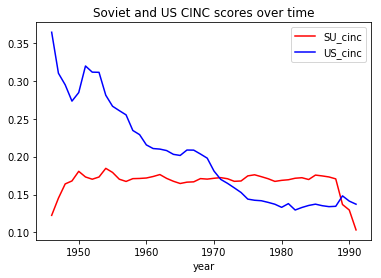

In [9]:
df3.plot('year', ['SU_cinc', 'US_cinc'], color=['r','b'], title='Soviet and US CINC scores over time')

Text(0.5,1,'SU interventions, US cincscore')

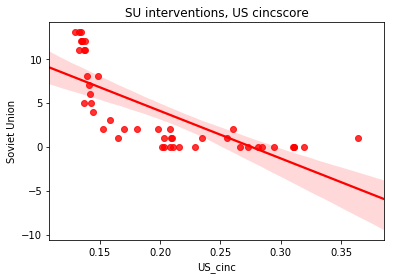

In [10]:
sn.regplot('US_cinc', 'Soviet Union', data=df3, color='r').set_title('SU interventions, US cincscore')

#### US strength and Soviet Interventions

The strong corrolation between US / Soviet military expenditure is not suprising in the context of the cold war. (Especially with the strong rise during the Reagan years). 
But its important to keep in mind the fact that military interventions (and the costs associated with them) rose as well. In fact, the steep decline at the end of the Soviet Graph coincides with the end of the intervention in Afghanistan. 

When adding their own *'MILEX'* as a control variable in the linear model, the correlation between Soviet interventions and the *'US_MILEX'* variable disappears completely. 

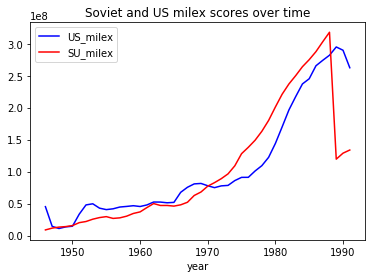

In [11]:
df3.plot('year', ['US_milex', 'SU_milex'], color=['b','r'], title='Soviet and US milex scores over time')

Text(0.5,1,'Soviet interventions vs Soviet MILEX')

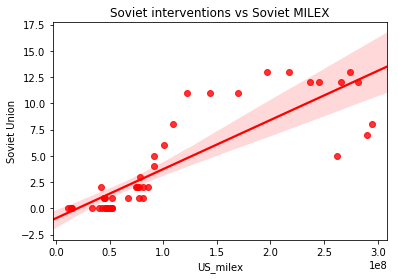

In [12]:
sn.regplot('US_milex', 'Soviet Union', data=df3, color='r').set_title('Soviet interventions vs Soviet MILEX')

#### Number of Soviet interventions - linear function

In [13]:
# Soviet Interventions - US power
model = sm.OLS(df3['Soviet Union'],df3[['US_cinc', 'US_milex', 'SU_milex']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Soviet Union   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 28 May 2018   Prob (F-statistic):           6.32e-29
Time:                        19:50:56   Log-Likelihood:                -77.932
No. Observations:                  46   AIC:                             161.9
Df Residuals:                      43   BIC:                             167.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
US_cinc       -4.4033      1.191     -3.696      0.0

## Number of US Interventions per year vs strength of the Soviet Union

As the Soviet CINC score remains stable most of the time, the US interventions cluster around it. The linear model shows no significance, a deviation from the Soviet model. 

Contrary to the Soviet case, the *'SU_MILEX'* variable remains significant in the linear model, despite adding the *'US_MILEX'* control variable. The addition does halve the coefficient of the '*SU_MILEX*' variable. 

The *'MILEX'* variable is a more accurate assessment of military strength and it seems that the power of the Soviet military had more of an effect than the Soviet economy on US policy. 

Text(0.5,1,'US interventions, SU cincscore')

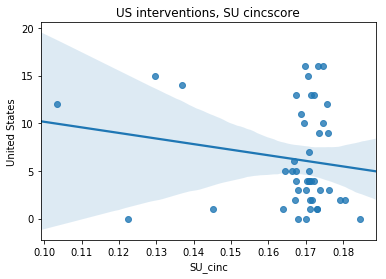

In [14]:
sn.regplot('SU_cinc', 'United States', data=df3).set_title('US interventions, SU cincscore')

Text(0.5,1,'US interventions vs US MILEX ')

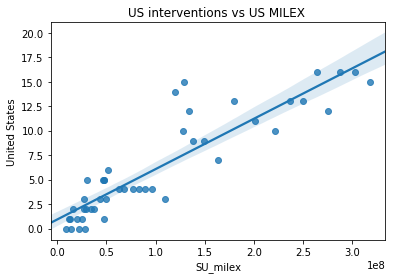

In [15]:
sn.regplot('SU_milex', 'United States', data=df3).set_title('US interventions vs US MILEX ')

#### Number of US interventions - linear function

In [16]:
# US Interventions - SU power
model = sm.OLS(df3['United States'],df3[['SU_cinc', 'SU_milex', 'US_milex']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          United States   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 28 May 2018   Prob (F-statistic):           7.48e-30
Time:                        19:50:57   Log-Likelihood:                -88.106
No. Observations:                  46   AIC:                             182.2
Df Residuals:                      43   BIC:                             187.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SU_cinc        0.9668      2.329      0.415      0.6

#### Colonial Powers

The linear model for colonial powers shows a strong negative correlation with the power of the United States (cinc score). This makes sense if we consider that the *'US_CINC'* score was at its highest in the period directly following the Second World War, a period during which the United States dissuaded its allies from intervening.

The graph below shows  that the UK cinc score shows a simular demobilization before accompanying France its score in a slow but steady decline. The European interventions pick up sporadically as the *'US_CINC'* score declines - but this does not have to be connected. Just as political reasons caused the US to resist European attempts to regain their colonies after the war - the rise of communist regimes in former colonies might motivate them to allow these kind of interventions later. (And, as the literature shows, even support some of them)

I have therefore created three different linear models below. The first is limited to the *'MILEX'* and *'CINC'* scores of the US, the Soviet Union and England and France (as the strongest and most intervention prone of the European powers) 

The second model includes control variables for the number of Soviet and US interventions that year. As the cold war heats up, the number of interventions will rise - and so might any reason for the US to alter its anti colonial policies. 

The third model adds two additional control variables: the number of French and British interventions. This is done to control for the 'Ally effect' - where the colonial powers fought as allies in a war instigated by the United States, instead of conducting an armed intervention on their own accord. 


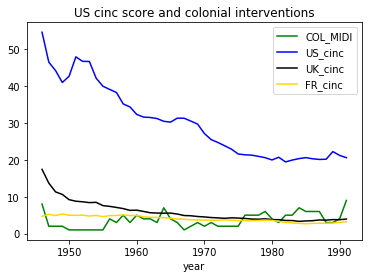

In [17]:
df2.plot('year', ['COL_MIDI', 'US_cinc',
                  'UK_cinc', 'FR_cinc']
         , color=['g', 'b', 'black', 'gold'],
         title='US cinc score and colonial interventions')

Text(0.5,1,'US cinc score and colonial interventions')

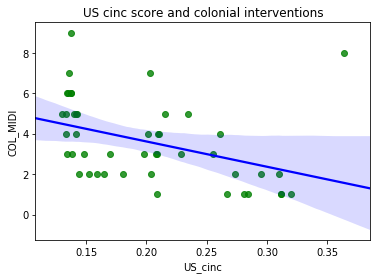

In [18]:
sn.regplot('US_cinc', 'COL_MIDI'
           , data=df3, color='g', 
           scatter_kws={"color": "green"}, line_kws={"color": "blue"}
          ).set_title('US cinc score and colonial interventions')

#### Linear models

The first model shows that, of all of the variables linked to the cold war superpowers, only the *'US_CINC'* score is significant and is has the negative effect that would be expected from the earlier graphs. 
    
French and British power as a significant correlation with the number of interventions, as can be expected. The *'UK_CINC'* variable was not significant, but their *'MILEX'* score was - a more direct measurement of military power.
    
The French *'MILEX'* variable had a negative effect, but it was offset by their *'CINC'* score. 



The *'US_CINC'* variable is no longer significant in the second model. The significance of the number of US interventions is lickely an example of the 'Ally effect'. 

In [19]:
# Colonial interventions - SU power
model = sm.OLS(df3['COL_MIDI'],df3[['SU_cinc', 'SU_milex', 
                                    'US_cinc', 'US_milex', 
                                    'UK_cinc', 'UK_milex', 
                                    'FR_cinc', 'FR_milex',
                                   ]]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COL_MIDI   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     36.49
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.59e-15
Time:                        19:50:58   Log-Likelihood:                -80.725
No. Observations:                  46   AIC:                             177.5
Df Residuals:                      38   BIC:                             192.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SU_cinc      -23.1594     23.431     -0.988      0.3

In [20]:
# Colonial interventions - SU power
model = sm.OLS(df3['COL_MIDI'],df3[['SU_cinc', 'SU_milex', 
                                    'US_cinc', 'US_milex', 
                                    'UK_cinc', 'UK_milex', 
                                    'FR_cinc', 'FR_milex',
                                   'Soviet Union', 'United States',
                                   ]]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COL_MIDI   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     33.63
Date:                Mon, 28 May 2018   Prob (F-statistic):           2.72e-15
Time:                        19:50:58   Log-Likelihood:                -76.700
No. Observations:                  46   AIC:                             173.4
Df Residuals:                      36   BIC:                             191.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SU_cinc         -34.8867     22.569     -1.546

#### Model 3

*'US_CINC'* returns as a significant variable, but with a higher P value and a reduced effect. The same if true for the French and British *'MILEX'* variables. 

It should be no suprise that both the number of French and British interventions is higly significant. More interesting is the fact that neither Soviet or US interventions have any effect. Based on this model the only limited factors on European interventions are diplomatic pressure from the United States and - to a lesser extend - the power of the European countries themselves. 

This outcome matches the traditional narrative of a weakened Europe being presured by the United States to relinquish their colonial holdings. 



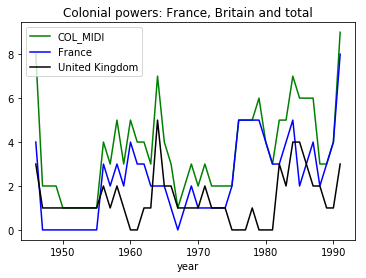

In [21]:
df2.plot('year', ['COL_MIDI', 'France', 'United Kingdom']
         , color=['g', 'b', 'black', 'gold'],
         title='Colonial powers: France, Britain and total')

In [22]:
# Colonial interventions - SU power
model = sm.OLS(df3['COL_MIDI'],df3[['SU_cinc', 'SU_milex', 
                                    'US_cinc', 'US_milex', 
                                    'UK_cinc', 'UK_milex', 
                                    'FR_cinc', 'FR_milex',
                                   'Soviet Union', 'United States',
                                   'France','United Kingdom']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COL_MIDI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     325.2
Date:                Mon, 28 May 2018   Prob (F-statistic):           2.09e-31
Time:                        19:50:58   Log-Likelihood:                -21.147
No. Observations:                  46   AIC:                             66.29
Df Residuals:                      34   BIC:                             88.24
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
SU_cinc           -0.7251      7.229     -0.

### Relative economic and military power - Logit Analysis

This model contains a *'YEAR'* variable - which was added as a temporal variable  to compensate for the high cinc score following the end of the war. It has the effect of making the *'US_cinc'* score insignificant. 

The variables that remain significant are both the *'CINC'* and *'GDPPC'* attributes of the target nation, the stronger the nation, the more unlikely an US intervention. 

If an Soviet intervention of any form occured (from money, logistic support to direct military intervention) the odds of a US military intervention increase significantly. 


In [23]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'Soviet Union',
 'year',
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.202725
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4656
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1180
Time:                        19:50:59   Log-Likelihood:                -946.32
converged:                       True   LL-Null:                       -1073.0
                                        LLR p-value:                 5.645e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
US_cinc        -10.1953      8.026     -1.270      0.204     -25.927       5.536
US_milex      4.975e-0

The second model includes control variables for the involvement of the European powers. 

It intereseting that the effect of a French intervention is stronger than that of a Soviet intervention. A British intervention is also significant. The relative power of the European powers seems to matter less, with only the *'FR_GDPPC'* variable having a significant - negative - effect. 

The strength of the target nation remains important, but in this model only the *'GDPPC'*  variable remains significant. 



In [24]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'Soviet Union',
 'year',
 'France',
 'United Kingdom',
 'FR_cinc',
 'FR_milex',
 'FR_gdppc',
 'UK_cinc',
 'UK_milex',
 'UK_gdppc'
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.195905
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4648
Method:                           MLE   Df Model:                           19
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1477
Time:                        19:50:59   Log-Likelihood:                -914.48
converged:                       True   LL-Null:                       -1073.0
                                        LLR p-value:                 6.529e-56
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
US_cinc           -9.5954     13.037     -0.736      0.462     -35.147      15.957
US_milex        

#### Soviet Union

Model 1 for the Soviet Union shows, unlike the United States', it has significant correlation with both its own, the US and the target nations strength.

This effect disappears when controling for the European powers. A present French intervention seems to be a deterrence for a Soviet Intervention, whereas a British intervention seems to invite one.  


In [25]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'United States',
 'year',
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.129102
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4656
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2259
Time:                        19:50:59   Log-Likelihood:                -602.65
converged:                       True   LL-Null:                       -778.49
                                        LLR p-value:                 1.068e-68
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
US_cinc          27.6306     15.605      1.771      0.077      -2.955      58.216
US_milex      -5.92

In [26]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'United States',
 'year',
 'France',
 'United Kingdom',
 'FR_cinc',
 'FR_milex',
 'FR_gdppc',
 'UK_cinc',
 'UK_milex',
 'UK_gdppc'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.126641
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4648
Method:                           MLE   Df Model:                           19
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2406
Time:                        19:50:59   Log-Likelihood:                -591.16
converged:                       True   LL-Null:                       -778.49
                                        LLR p-value:                 8.015e-68
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
US_cinc           16.5142     21.220      0.778      0.436     -25.076      58.104
US_milex        

#### Colonial powers

1. Soviet CINCSoviet matters, anti coll deterence
2. US allies
3. Su dus eng
4. Local detterence

In [27]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'United States',
 'Soviet Union',
 'year',
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.130637
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4655
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1250
Time:                        19:51:00   Log-Likelihood:                -609.81
converged:                       True   LL-Null:                       -696.96
                                        LLR p-value:                 6.324e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
US_cinc          -7.7103      6.373     -1.210      0.226     -20.202       4.781
US_milex      -2.03

Tekst hierover

In [28]:
print(run([
 'US_cinc',
 'US_milex',
 'US_gdppc',
 'SU_cinc',
 'SU_milex',
 'SU_gdppc',
 'milex',
 'cinc',
 'gdppc',
 'pop',
 'United States',
 'Soviet Union',
 'year',
 'FR_cinc',
 'FR_milex',
 'FR_gdppc',
 'UK_cinc',
 'UK_milex',
 'UK_gdppc'
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.130329
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 4668
Model:                          Logit   Df Residuals:                     4649
Method:                           MLE   Df Model:                           18
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1271
Time:                        19:51:00   Log-Likelihood:                -608.37
converged:                       True   LL-Null:                       -696.96
                                        LLR p-value:                 3.492e-28
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
US_cinc         -14.3904     12.555     -1.146      0.252     -38.998      10.217
US_milex      -2.51

## Analysis 2: Political variables

### Targets political system

no intervention in stable regimes, anarchy matters

In [29]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab'
],       
 'United States'))

Optimization terminated successfully.
         Current function value: 0.162526
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6895
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 May 2018   Pseudo R-squ.:                 0.06289
Time:                        19:51:00   Log-Likelihood:                -1121.4
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 1.582e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -3.3716      0.141    -23.942      0.000      -3.648      -3.096
anoc          -2.8457      0.

Direct SU int no effect

In [30]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'Soviet Union'
],   
 'United States'))

Optimization terminated successfully.
         Current function value: 0.150941
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6894
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1297
Time:                        19:51:00   Log-Likelihood:                -1041.5
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 5.885e-65
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
democ           -3.4553      0.143    -24.080      0.000      -3.737      -3.174
anoc            -3.0689

In [31]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'Soviet Union',
 'war',
],   
 'United States'))

Optimization terminated successfully.
         Current function value: 0.129097
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6893
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2556
Time:                        19:51:00   Log-Likelihood:                -890.77
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                6.540e-129
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
democ           -3.8524      0.157    -24.524      0.000      -4.160      -3.545
anoc            -3.7239

In [32]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.127001
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6895
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 May 2018   Pseudo R-squ.:                -0.02853
Time:                        19:51:01   Log-Likelihood:                -876.31
converged:                       True   LL-Null:                       -852.00
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -4.6423      0.279    -16.658      0.000      -5.188      -4.096
anocl         -3.2026      0.

SU 

Coup effect no longer relevant

In [33]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'United States'
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.109576
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6894
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1126
Time:                        19:51:01   Log-Likelihood:                -756.08
converged:                       True   LL-Null:                       -852.00
                                        LLR p-value:                 1.579e-39
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -5.1068      0.289    -17.686      0.000      -5.673      -4.541
anoc             -3.

## United States B: Own Politics

United States

- Republican effect
- Reagan effect measured. 

,Republican,United States,Soviet Union,COL_MIDI
0,0.0,77.0,42.0,65
1,1.0,211.0,143.0,101


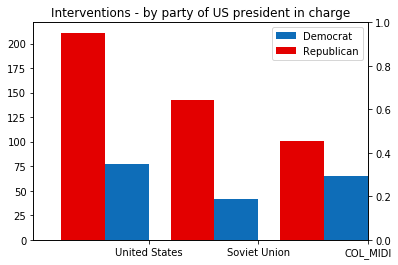

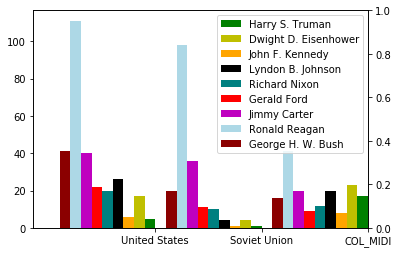

In [34]:
# Probably should have added another 'presidents' string column

# Create president and party datasets

df_pres = df.groupby(
    [
        'Dwight D. Eisenhower', 'George H. W. Bush',
        'Gerald Ford', 'Harry S. Truman', 'Jimmy Carter',
        'John F. Kennedy', 'Lyndon B. Johnson', 'Richard Nixon',
        'Ronald Reagan']
).sum()[['United States', 'Soviet Union', 'COL_MIDI']].reset_index()

df_pol = df.groupby(['Republican']).sum()[['United States', 'Soviet Union', 'COL_MIDI']].reset_index()



# Create first graph, by party
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_pol[df_pol['Republican'] == 0][[
    'United States',
    'Soviet Union',
    'COL_MIDI',    
]].sum().plot.bar(
    color='#0e6db8', ax=ax, width=width, position=1,
    label='Democrat', legend=True)

df_pol[df_pol['Republican'] == 1][[
    'United States',
    'Soviet Union',
    'COL_MIDI',    
]].sum().plot.bar(
    title='Interventions - by party of US president in charge',
    color='#E30000', ax=ax, width=width, position=2,
    label='Republican', legend=True, rot=0)



# Create second graph, by president
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.1

def plotter(name, number):
    df_pres[df_pres[name] == 1][[
    'United States',
    'Soviet Union',
    'COL_MIDI',    
]].sum().plot.bar(
    color=colors[counter], ax=ax, width=width, position=number,
    label=name, legend=True, rot=0)

presidents = ['Harry S. Truman', 'Dwight D. Eisenhower', 'John F. Kennedy',
'Lyndon B. Johnson', 'Richard Nixon', 'Gerald Ford', 
'Jimmy Carter', 'Ronald Reagan', 'George H. W. Bush']
colors = ['x', 'g', 'y', 'orange', 'black', 'teal', 'r', 'm', 'lightblue', 'darkred']

# To many to draw manually, automate
counter = 0
for president in presidents:
    counter +=1
    plotter(president, counter)
    
# FIXME / TODO - Create better tables. 
df_pol

In [35]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',
 'Republican',

],       
 'United States'))

Optimization terminated successfully.
         Current function value: 0.160291
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6894
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 May 2018   Pseudo R-squ.:                 0.07577
Time:                        19:51:02   Log-Likelihood:                -1106.0
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 2.750e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -3.8964      0.178    -21.878      0.000      -4.245      -3.547
anoc          -3.3300      0.

Presidents:
(Using Truman as Base)

In [36]:
print(run([
 'democ',
 'anoc',
 'autoc', 
 'anarc',
 'instab',    
 'Dwight D. Eisenhower',
 'George H. W. Bush',
 'Gerald Ford',
# 'Harry S. Truman',  
  'Jimmy Carter', 
  'John F. Kennedy', 
  'Lyndon B. Johnson', 
  'Richard Nixon',
  'Ronald Reagan',


],       
 'United States'))


Optimization terminated successfully.
         Current function value: 0.149770
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6887
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.1364
Time:                        19:51:02   Log-Likelihood:                -1033.4
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                 1.234e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
democ                   -5.6406      0.470    -12.010      0.000      -6.561      -4.720

COLS

- Mirror US anarc, ally?

In [37]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab',
 'United States', 
 'Soviet Union',
    
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.112034
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6893
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 May 2018   Pseudo R-squ.:                 0.01237
Time:                        19:51:03   Log-Likelihood:                -773.03
converged:                       True   LL-Null:                       -782.72
                                        LLR p-value:                  0.003580
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -4.6832      0.264    -17.760      0.000      -5.200      -4.166
anocl            -3.

Now with location dmummy, as col proxy

Anarc effect stays. no other effects.

In [38]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.111397
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6808
Model:                          Logit   Df Residuals:                     6800
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 May 2018   Pseudo R-squ.:                 0.02828
Time:                        19:51:03   Log-Likelihood:                -758.39
converged:                       True   LL-Null:                       -780.46
                                        LLR p-value:                 2.011e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -4.8215      0.272    -17.729      0.000      -5.355      -4.289
anocl         -3.7179      0.

No soviet effect!

In [39]:
print(run([
 'democ',
 'anocl',
 'autoc', 
 'anarc',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'United States', 
 'Soviet Union',
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.103940
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6808
Model:                          Logit   Df Residuals:                     6798
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 May 2018   Pseudo R-squ.:                 0.09332
Time:                        19:51:03   Log-Likelihood:                -707.63
converged:                       True   LL-Null:                       -780.46
                                        LLR p-value:                 6.942e-27
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -5.2674      0.302    -17.433      0.000      -5.860      -4.675
anocl            -3.

## Analysis 3: Type of war being fought

placeholder



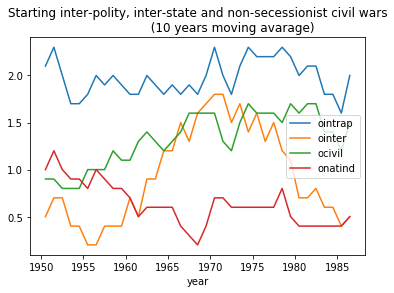

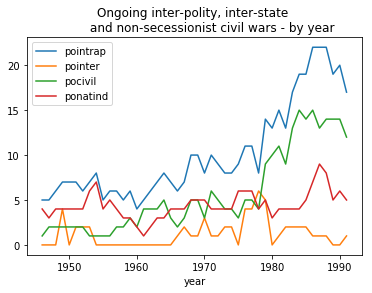

In [40]:
df3.rolling(10).mean().plot('year', 
                            ['ointrap',
                             'ointer', 'ocivil',
                             'onatind'],
         title='''Starting inter-polity, inter-state and non-secessionist civil wars
                  (10 years moving avarage)''')

df3.plot('year', ['pointrap', 'pointer', 'pocivil', 'ponatind'],
         title='''Ongoing inter-polity, inter-state 
         and non-secessionist civil wars - by year''')

### Why year?  Because distribution of wars differs by year

In [41]:
print(run([
    'pointrap',
    'pointer',
    'ponatind',
    'onatind',
    'ointrap',
    'ointer',
    'Soviet Union',
    'year', 
],   
    
 'United States'))

#Singular matrix for excluded variables

Optimization terminated successfully.
         Current function value: 0.129836
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6892
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2514
Time:                        19:51:04   Log-Likelihood:                -895.87
converged:                       True   LL-Null:                       -1196.7
                                        LLR p-value:                1.087e-125
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
pointrap         3.4745      0.171     20.300      0.000       3.139       3.810
pointer          3.2045

Tekst hierover



False


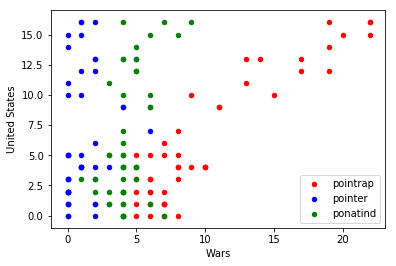

In [42]:
ax1 = df3.plot.scatter(x='pointrap', y='United States',
            color='r', label='pointrap')    
ax2 = df3.plot.scatter(x='pointer', y='United States',
            color='b', ax=ax1, label='pointer')     
ax3 = df3.plot.scatter(x='ponatind', y='United States',
            color='g', ax=ax1, label='ponatind').set_xlabel("Wars")
ax1.legend()
print(ax1 == ax2 == ax3)  # True

Text(0.5,1,'Type of war VS US intervention')

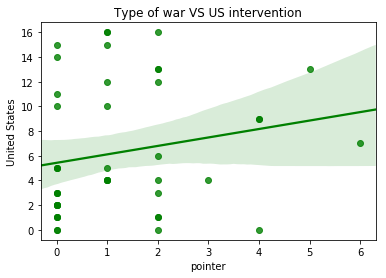

In [43]:
sn.regplot('pointer', 'United States'
           , data=df3, color='g', label='pointer', 
          ).set_title('Type of war VS US intervention')

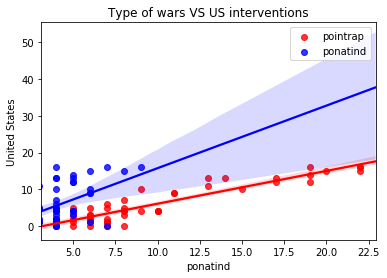

In [44]:
sn.regplot('pointrap', 'United States'
           , data=df3, color='r', label='pointrap',
          ).set_title('Type of wars VS US interventions')

sn.regplot('ponatind', 'United States'
           , data=df3, color='b', label='ponatind', 
          ).legend()

In [45]:
print(run([
    'pointrap',
    'pointer',
    'ponatind',
    'onatind',
    'ointrap',
    'ointer',
    'United States',
    'year',
    
],   
    
 'Soviet Union'))

#Singular matrix for excluded variables

Optimization terminated successfully.
         Current function value: 0.096095
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6892
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2218
Time:                        19:51:06   Log-Likelihood:                -663.05
converged:                       True   LL-Null:                       -852.00
                                        LLR p-value:                 1.310e-77
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
pointrap          3.2938      0.206     16.017      0.000       2.891       3.697
pointer           2.

False


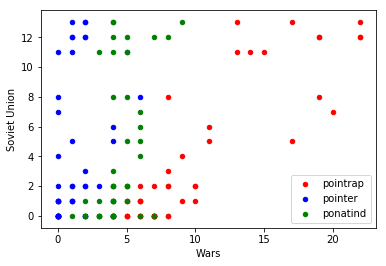

In [46]:
ax1 = df3.plot.scatter(x='pointrap', y='Soviet Union',
            color='r', label='pointrap')    
ax2 = df3.plot.scatter(x='pointer', y='Soviet Union',
            color='b', ax=ax1, label='pointer')     
ax3 = df3.plot.scatter(x='ponatind', y='Soviet Union',
            color='g', ax=ax1, label='ponatind').set_xlabel("Wars")
ax1.legend()
print(ax1 == ax2 == ax3)  # True

Text(0.5,1,'Type of war VS Soviet intervention')

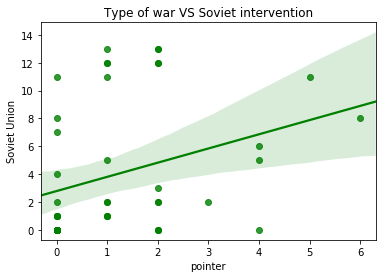

In [47]:
sn.regplot('pointer', 'Soviet Union'
           , data=df3, color='g', label='pointer', 
          ).set_title('Type of war VS Soviet intervention')

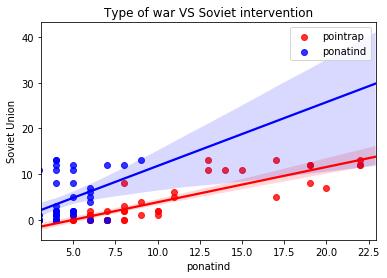

In [48]:
sn.regplot('pointrap', 'Soviet Union'
           , data=df3, color='r', label='pointrap',
          ).set_title('Type of war VS Soviet intervention')

sn.regplot('ponatind', 'Soviet Union'
           , data=df3, color='b', label='ponatind', 
          ).legend()

Placeholder

In [49]:
print(run([
    'pointrap',
    'pointer',
    'ponatind',
    'onatind',
    'ointrap',
    'ointer',
    'ocivil',
    'year',
    'Soviet Union',    
    'United States',
],   
    
 'COL_MIDI'))

         Current function value: 0.102362
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 6900
Model:                          Logit   Df Residuals:                     6890
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 May 2018   Pseudo R-squ.:                 0.09764
Time:                        19:51:08   Log-Likelihood:                -706.30
converged:                      False   LL-Null:                       -782.72
                                        LLR p-value:                 2.271e-28
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
pointrap          1.2377      0.279      4.432      0.000       0.690       1.785
pointer           0.7502      0.558      1.345      0.17

/home/jasper/Dropbox/ULTRADOCUMENTEN/THESIS_CIVIL_WAR/THESIS/venv/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Analysis 4: New Nations and colonialism

tekst hierover

## Wars and decolonisation


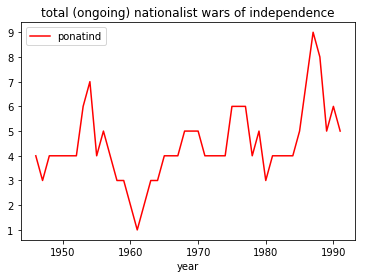

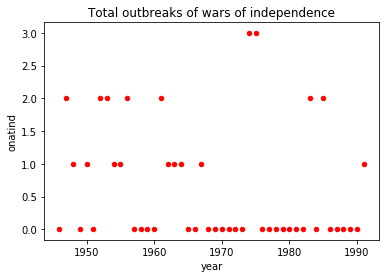

In [50]:
df2.plot(
    'year', 'ponatind', color='r', 
    title='total (ongoing) nationalist wars of independence')

df2.plot.scatter(
    'year', 'onatind', color='r', 
    title='Total outbreaks of wars of independence')

Text(0.5,1,'Colonial interventions, wars of independence')

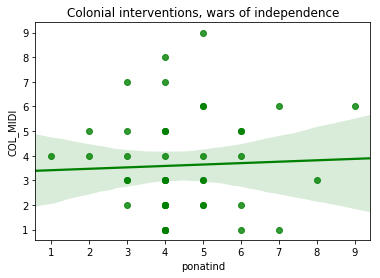

In [51]:
sn.regplot('ponatind', 'COL_MIDI', data=df2, color='g', label='Outbreak').set_title('Colonial interventions, wars of independence')

Text(0.5,1,'Soviet interventions, wars of independence')

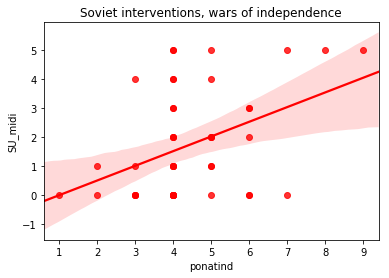

In [52]:
sn.regplot('ponatind', 'SU_midi', data=df2, color='r', label='Ongoing').set_title('Soviet interventions, wars of independence')

Text(0.5,1,'US interventions, wars of independence')

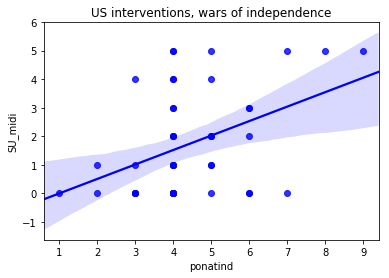

In [53]:
sn.regplot('ponatind', 'SU_midi', data=df2, color='b', label='Ongoing').set_title('US interventions, wars of independence')

## Discussion:

EU collapse, both US en SU in hole

In [54]:
model = sm.OLS(df2['United States'],df2[['onatind', 'ponatind']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          United States   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     51.63
Date:                Mon, 28 May 2018   Prob (F-statistic):           2.87e-12
Time:                        19:51:11   Log-Likelihood:                -133.83
No. Observations:                  46   AIC:                             271.7
Df Residuals:                      44   BIC:                             275.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
onatind       -0.9662      0.716     -1.350      0.1

In [55]:
model = sm.OLS(df2['Soviet Union'],df2[['onatind', 'ponatind']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Soviet Union   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     25.84
Date:                Mon, 28 May 2018   Prob (F-statistic):           3.78e-08
Time:                        19:51:11   Log-Likelihood:                -131.29
No. Observations:                  46   AIC:                             266.6
Df Residuals:                      44   BIC:                             270.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
onatind       -0.9119      0.677     -1.346      0.1

In [56]:
model = sm.OLS(df2['COL_MIDI'],df2[['onatind', 'ponatind']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COL_MIDI   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     51.37
Date:                Mon, 28 May 2018   Prob (F-statistic):           3.11e-12
Time:                        19:51:11   Log-Likelihood:                -102.73
No. Observations:                  46   AIC:                             209.5
Df Residuals:                      44   BIC:                             213.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
onatind       -0.0742      0.364     -0.204      0.8

In [57]:
print(run([
 'US_cinc',
 'US_milex',
 'milex',
 'cinc',
#  'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'lamerica',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
    
],   
    
 'United States'))

Optimization terminated successfully.
         Current function value: 0.147043
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.3485
Time:                        19:51:11   Log-Likelihood:                -711.25
converged:                       True   LL-Null:                       -1091.7
                                        LLR p-value:                1.342e-151
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
US_cinc         -8.7014      2.286     -3.807      0.000     -13.181      -4.221
US_milex      3.526e-0

In [58]:
print(run([
 'SU_cinc',
 'SU_milex',
 'milex',
 'cinc',
 'United States',
#  'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'lamerica',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
    
],   
    
 'Soviet Union'))

Optimization terminated successfully.
         Current function value: 0.107443
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           Soviet Union   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.3381
Time:                        19:51:11   Log-Likelihood:                -519.70
converged:                       True   LL-Null:                       -785.20
                                        LLR p-value:                9.392e-103
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
SU_cinc         -11.7840      5.284     -2.230      0.026     -22.140      -1.428
SU_milex       9.49

In [59]:
print(run([
 'milex',
 'cinc',
 'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
],   
    
 'COL_MIDI'))

Optimization terminated successfully.
         Current function value: 0.111893
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               COL_MIDI   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4822
Method:                           MLE   Df Model:                           14
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2478
Time:                        19:51:11   Log-Likelihood:                -541.23
converged:                       True   LL-Null:                       -719.54
                                        LLR p-value:                 1.674e-67
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
milex         -3.162e-08   3.53e-08     -0.896      0.370   -1.01e-07    3.76e-08
cinc             15

UK

1. Does not attack powerfull nations (CINC)
2. Less active by time, only in crisis (War, insab - regime) 
3. Like rest of EU, asia is closed of. 
4. Remove - 'years since nation state creation'  and Africa coef 0.7089  P   0.031
5. Does not care about soviet threat. US support (ally)
6. More assertive IF power grows, but it delinces (cinc, year)
7. Does not attack democracies

In [60]:
print(run([
 'UK_cinc',
 'UK_milex',
 'milex',
 'cinc',
 'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'war', 
 'year',
 'pointrap',
 'oilpc', 
    
],   
    
 'United Kingdom'))

Optimization terminated successfully.
         Current function value: 0.052406
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:         United Kingdom   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2553
Time:                        19:51:12   Log-Likelihood:                -253.49
converged:                       True   LL-Null:                       -340.39
                                        LLR p-value:                 1.471e-28
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
UK_cinc          29.8515      7.106      4.201      0.000      15.924      43.779
UK_milex       5.69

France

1. Years have not been kind
2. Own strenght matter, others not. #LEEEEROY JENKINS
3. US support (or vice versa), does not care about cold war


In [61]:
print(run([
 'FR_cinc',
 'FR_milex',
 'milex',
 'cinc',
 'United States',
 'Soviet Union',
 'anarc',
 'autoc',
 'democ',
 'instab',
 'ssafrica',
 'asia',
 'nafrme',
 'war', 
 'year',
 'pointrap',
 'oilpc',  

],   
    
 'France'))

Optimization terminated successfully.
         Current function value: 0.073358
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 France   No. Observations:                 4837
Model:                          Logit   Df Residuals:                     4820
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.2988
Time:                        19:51:12   Log-Likelihood:                -354.83
converged:                       True   LL-Null:                       -506.01
                                        LLR p-value:                 8.285e-55
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
FR_cinc         126.8778     38.171      3.324      0.001      52.064     201.692
FR_milex       5.12